In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('cleaned_star_data.csv')
print("Initial Shape:", df.shape)

Initial Shape: (1009, 47)


In [19]:
df.columns = df.columns.str.replace("\u2013", "-", regex=True)  # en dash → hyphen
df.columns = df.columns.str.replace("\x96", "-", regex=True)   # weird dash → hyphen
df.columns = df.columns.str.strip()

In [20]:
df = df.dropna()
print("Shape after dropping missing values:", df.shape)

Shape after dropping missing values: (1000, 47)


In [21]:
y = df['Historical_Star_Rating']
X = df.drop(["Historical_Star_Rating", "CONTRACT_ID", "Member_ID", "age"], axis=1)

In [22]:
if "Region" in X.columns:
    le = LabelEncoder()
    X["Region"] = le.fit_transform(X["Region"])


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
    stratify=pd.cut(y, bins=5)
)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (800, 43)
Test set shape: (200, 43)


In [24]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42
)

In [25]:
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("XGBoost Model Evaluation Results:\n")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

XGBoost Model Evaluation Results:

Mean Absolute Error (MAE): 0.3333
Mean Squared Error (MSE): 0.1453
Root Mean Squared Error (RMSE): 0.3812
R² Score: 0.9000


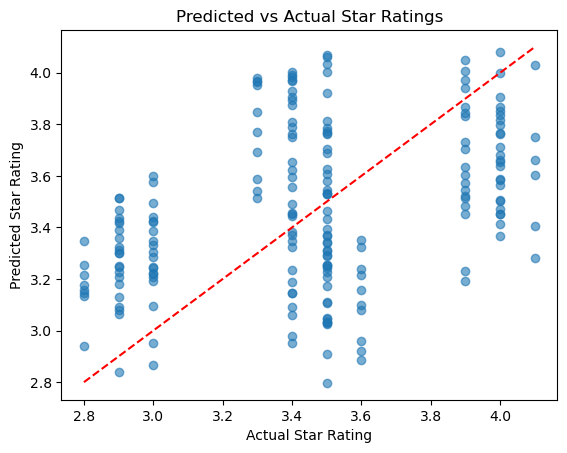

In [27]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--")
plt.xlabel("Actual Star Rating")
plt.ylabel("Predicted Star Rating")
plt.title("Predicted vs Actual Star Ratings")
plt.show()

In [28]:
import joblib

joblib.dump(xgb_model, "xgb_model.pkl")
print("✅ Model saved as xgb_model.pkl")

xgb_model.save_model("xgb_model.json")
print("✅ Model saved as xgb_model.json")

✅ Model saved as xgb_model.pkl
✅ Model saved as xgb_model.json


In [29]:
# Load models back
# ===============================
pkl_path = "xgb_model.pkl"
json_path = "xgb_model.json"

xgb_loaded_pkl = joblib.load(pkl_path)
xgb_loaded_json = xgb.XGBRegressor()
xgb_loaded_json.load_model(json_path)
